In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_parquet(r"DATA\Cleaned_Data.parquet")
df

,track_popularity,danceability,energy,key,liveness,valence,tempo,year,loudness,speechiness,acousticness,instrumentalness,duration_ms,mode,season_sin,season_cos
0,0.941407,0.642015,1.201668,0.173348,-0.809246,0.031929,0.042833,0.688661,1.001631,-0.046154,0.090038,-0.378394,-0.323002,1.0,-1.565539,-0.129258
1,0.981439,0.490384,0.643388,1.557808,1.081094,0.782525,-0.777291,0.688661,0.339454,-0.276923,-0.033347,-0.359552,-0.811837,1.0,1.202166,-0.129258
2,1.101535,0.138877,1.284580,-1.211111,-0.519571,0.439395,0.116133,0.688661,0.775328,0.128571,-0.004168,-0.378290,-0.598753,0.0,-1.565539,-0.129258
3,0.701216,0.435246,1.279053,0.450240,0.089589,-1.001750,0.039860,0.688661,0.677207,0.434066,-0.215506,-0.378352,-0.713124,1.0,-1.565539,-0.129258
4,1.061503,-0.033430,0.742884,-1.211111,-0.692598,0.919777,0.114944,0.688661,0.423680,-0.292308,-0.000417,-0.378394,-0.409689,1.0,-0.181686,-1.615004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32823,-0.019357,-1.563520,1.234833,-0.934219,-0.799525,-1.289121,0.270836,0.250758,1.234172,0.341758,-0.015840,-0.378394,-0.176734,1.0,-0.181686,-1.615004
32824,-0.900059,-0.915644,0.483091,-1.488003,1.197742,-0.474188,0.266041,0.163177,0.483233,-0.225275,-0.328012,-0.359284,2.084627,1.0,-0.181686,-1.615004
32825,-1.140250,-0.867398,0.676554,0.173348,-0.260354,-0.319779,0.264108,0.250758,0.359305,-0.158242,0.115048,-0.378389,-0.089515,0.0,-0.181686,-1.615004
32826,-1.100218,-0.198845,1.046897,-0.934219,0.990369,-0.868787,0.264814,0.250758,0.795463,0.510989,-0.302126,0.189985,2.302212,1.0,1.202166,-0.129258


In [31]:
df.corr().rank(ascending=0)


,track_popularity,danceability,energy,key,liveness,valence,tempo,year,loudness,speechiness,acousticness,instrumentalness,duration_ms,mode,season_sin,season_cos
track_popularity,1.0,5.0,15.0,14.0,14.0,7.0,12.0,6.0,6.0,10.0,2.0,15.0,15.0,5.0,14.0,2.0
danceability,3.0,1.0,14.0,5.0,16.0,2.0,16.0,3.0,8.0,2.0,11.0,10.0,13.0,13.0,12.0,8.0
energy,14.0,13.0,1.0,6.0,2.0,3.0,2.0,7.0,2.0,13.0,16.0,4.0,6.0,9.0,7.0,12.0
key,10.0,7.0,9.0,1.0,8.0,8.0,13.0,11.0,11.0,8.0,7.0,6.0,5.0,16.0,6.0,9.0
liveness,13.0,15.0,3.0,10.0,1.0,12.0,7.0,12.0,5.0,5.0,12.0,7.0,7.0,10.0,5.0,11.0
valence,7.0,2.0,4.0,3.0,13.0,1.0,14.0,15.0,7.0,4.0,10.0,16.0,9.0,8.0,3.0,14.0
tempo,11.0,16.0,5.0,15.0,5.0,13.0,1.0,9.0,4.0,6.0,14.0,5.0,8.0,4.0,8.0,10.0
year,4.0,4.0,6.0,7.0,12.0,16.0,6.0,1.0,3.0,3.0,5.0,2.0,16.0,15.0,16.0,3.0
loudness,5.0,6.0,2.0,13.0,3.0,6.0,3.0,2.0,1.0,9.0,15.0,14.0,14.0,12.0,15.0,5.0
speechiness,9.0,3.0,13.0,2.0,4.0,4.0,4.0,4.0,9.0,1.0,3.0,13.0,12.0,14.0,10.0,7.0


<Axes: >

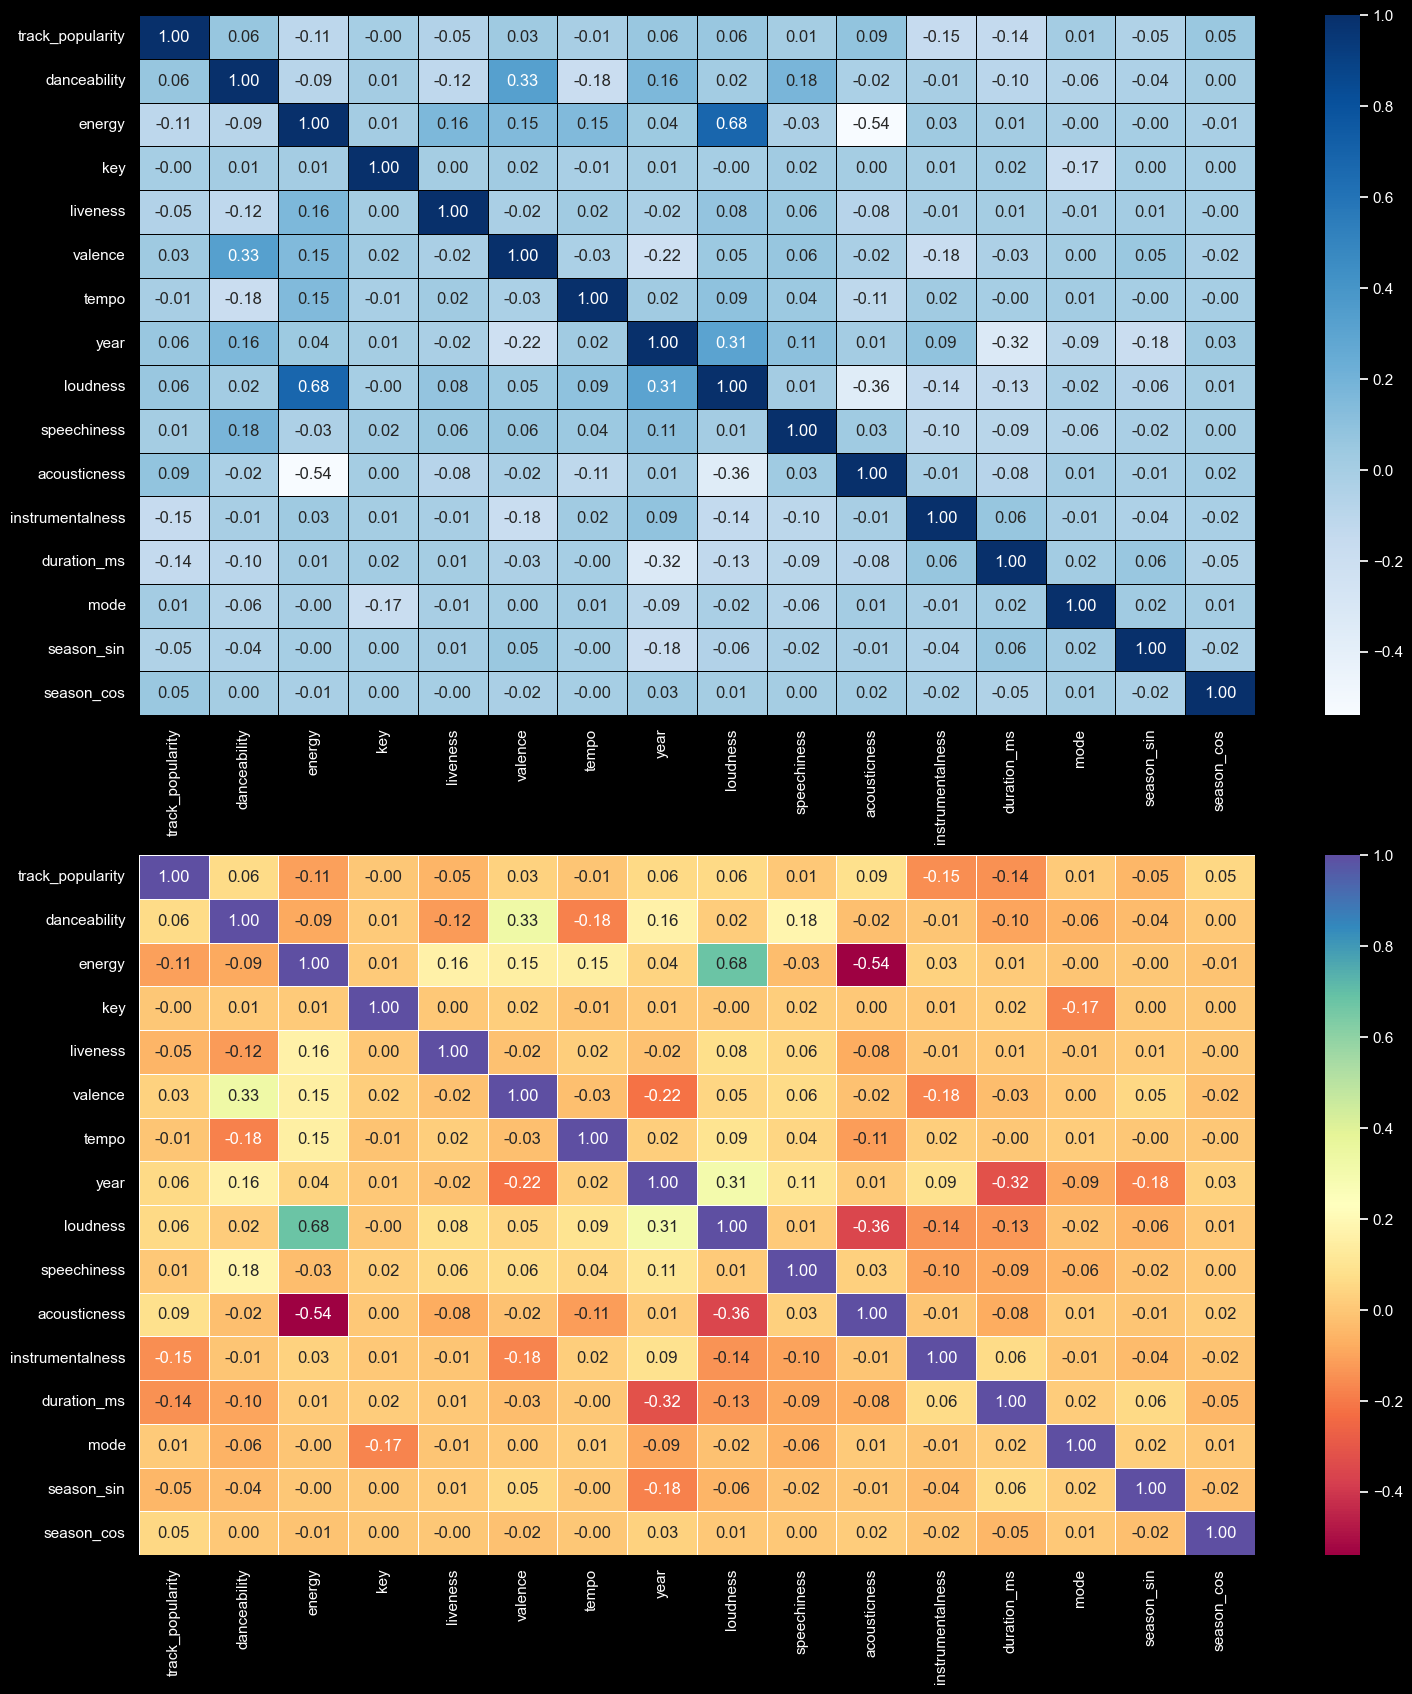

In [85]:
f, ax = plt.subplots(2, 1, figsize=(18, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax[0], cmap='Blues', linecolor='black')
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax[1], cmap='Spectral')

In [88]:
X = df
pca = PCA()
X_pca = pca.fit_transform(X)

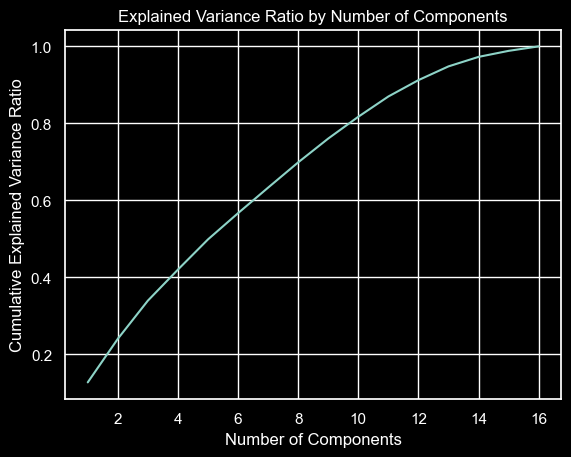

In [89]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.show()

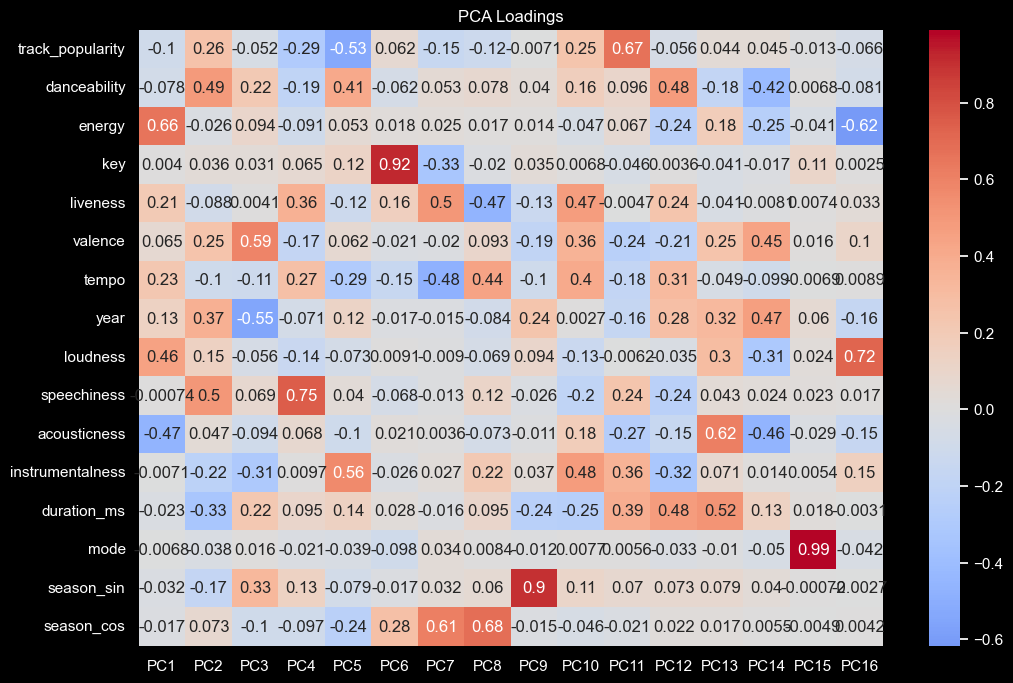

In [91]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i}' for i in range(1, 16 + 1)],
    index=df.columns
)

plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Loadings')
plt.show()

In [ ]:
pca = PCA(n_components=0.95, svd_solver='auto', whiten=True, random_state=42)
pca_data = pca.fit_transform(X)
pca_data

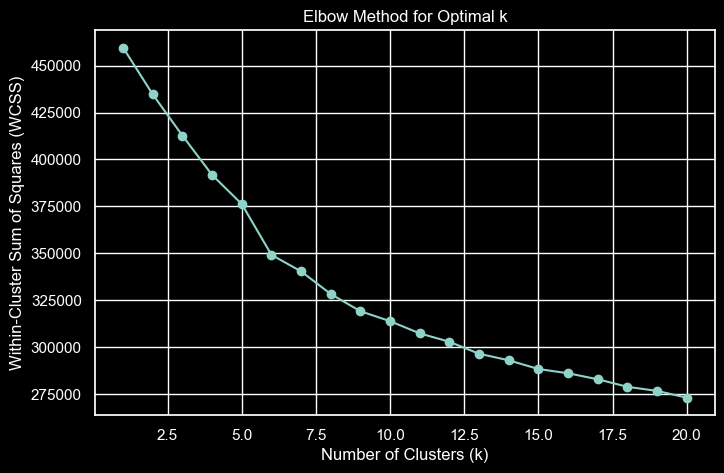

In [97]:
wcss = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [101]:
silhouette_scores = []
for k in range(2, 21):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    silhouette_scores.append(silhouette_score(pca_data, labels))
    print(k, silhouette_scores[k-2])


2 0.058892280541584
3 0.09397814144136439
4 0.09617382158235308
5 0.07343853996392191
6 0.08480635426709955
7 0.07148517977265251
8 0.06924445788444097
9 0.06848279888787018
10 0.07060093791176016
11 0.0680806013951404
12 0.06825185843176051
13 0.07004254444734329
14 0.07184010459024219
15 0.07185450223648784
16 0.0705363166294837
17 0.06785927032067499
18 0.06925459445525581
19 0.06904953001828563
20 0.06910239335732318


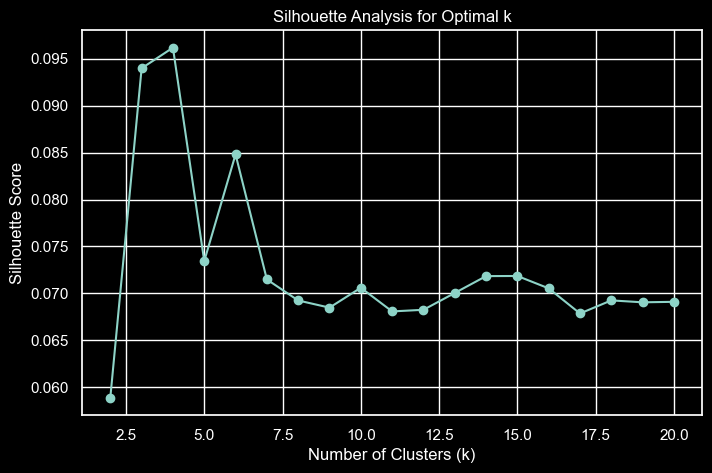

In [103]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

In [104]:
print("wcss: ", wcss)
print("silhouette_scores: ", silhouette_scores)

wcss:  [459578.0000000005, 434625.8598700006, 412648.59019765066, 391701.0817807699, 376173.0073838145, 349106.4525695874, 340278.61451642995, 328212.65201566176, 319043.4123700027, 313728.52134517056, 307237.07278991217, 302741.80450513377, 296365.67152757855, 292886.868266431, 288228.3092492901, 285968.9840848633, 282766.04663235584, 278752.6441744987, 276551.0599038707, 272957.94038439635]
silhouette_scores:  [0.058892280541584, 0.09397814144136439, 0.09617382158235308, 0.07343853996392191, 0.08480635426709955, 0.07148517977265251, 0.06924445788444097, 0.06848279888787018, 0.07060093791176016, 0.0680806013951404, 0.06825185843176051, 0.07004254444734329, 0.07184010459024219, 0.07185450223648784, 0.0705363166294837, 0.06785927032067499, 0.06925459445525581, 0.06904953001828563, 0.06910239335732318]


In [105]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_data)

labels = kmeans.labels_

df['Cluster_kmean'] = labels
df

,track_popularity,danceability,energy,key,liveness,valence,tempo,year,loudness,speechiness,acousticness,instrumentalness,duration_ms,mode,season_sin,season_cos,Cluster_kmean
0,0.941407,0.642015,1.201668,0.173348,-0.809246,0.031929,0.042833,0.688661,1.001631,-0.046154,0.090038,-0.378394,-0.323002,1.0,-1.565539,-0.129258,2
1,0.981439,0.490384,0.643388,1.557808,1.081094,0.782525,-0.777291,0.688661,0.339454,-0.276923,-0.033347,-0.359552,-0.811837,1.0,1.202166,-0.129258,2
2,1.101535,0.138877,1.284580,-1.211111,-0.519571,0.439395,0.116133,0.688661,0.775328,0.128571,-0.004168,-0.378290,-0.598753,0.0,-1.565539,-0.129258,2
3,0.701216,0.435246,1.279053,0.450240,0.089589,-1.001750,0.039860,0.688661,0.677207,0.434066,-0.215506,-0.378352,-0.713124,1.0,-1.565539,-0.129258,2
4,1.061503,-0.033430,0.742884,-1.211111,-0.692598,0.919777,0.114944,0.688661,0.423680,-0.292308,-0.000417,-0.378394,-0.409689,1.0,-0.181686,-1.615004,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32823,-0.019357,-1.563520,1.234833,-0.934219,-0.799525,-1.289121,0.270836,0.250758,1.234172,0.341758,-0.015840,-0.378394,-0.176734,1.0,-0.181686,-1.615004,2
32824,-0.900059,-0.915644,0.483091,-1.488003,1.197742,-0.474188,0.266041,0.163177,0.483233,-0.225275,-0.328012,-0.359284,2.084627,1.0,-0.181686,-1.615004,2
32825,-1.140250,-0.867398,0.676554,0.173348,-0.260354,-0.319779,0.264108,0.250758,0.359305,-0.158242,0.115048,-0.378389,-0.089515,0.0,-0.181686,-1.615004,2
32826,-1.100218,-0.198845,1.046897,-0.934219,0.990369,-0.868787,0.264814,0.250758,0.795463,0.510989,-0.302126,0.189985,2.302212,1.0,1.202166,-0.129258,2


In [112]:
db_score = davies_bouldin_score(pca_data, labels)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 2.7945579699589453


In [106]:
df.head()

,track_popularity,danceability,energy,key,liveness,valence,tempo,year,loudness,speechiness,acousticness,instrumentalness,duration_ms,mode,season_sin,season_cos,Cluster_kmean
0,0.941407,0.642015,1.201668,0.173348,-0.809246,0.031929,0.042833,0.688661,1.001631,-0.046154,0.090038,-0.378394,-0.323002,1.0,-1.565539,-0.129258,2
1,0.981439,0.490384,0.643388,1.557808,1.081094,0.782525,-0.777291,0.688661,0.339454,-0.276923,-0.033347,-0.359552,-0.811837,1.0,1.202166,-0.129258,2
2,1.101535,0.138877,1.284580,-1.211111,-0.519571,0.439395,0.116133,0.688661,0.775328,0.128571,-0.004168,-0.378290,-0.598753,0.0,-1.565539,-0.129258,2
3,0.701216,0.435246,1.279053,0.450240,0.089589,-1.001750,0.039860,0.688661,0.677207,0.434066,-0.215506,-0.378352,-0.713124,1.0,-1.565539,-0.129258,2
4,1.061503,-0.033430,0.742884,-1.211111,-0.692598,0.919777,0.114944,0.688661,0.423680,-0.292308,-0.000417,-0.378394,-0.409689,1.0,-0.181686,-1.615004,2


In [107]:
cluster_summary = df.groupby('Cluster_kmean').mean()
print(cluster_summary)

               track_popularity  danceability    energy       key  liveness  \
Cluster_kmean                                                                 
0                      0.082017     -0.351134 -0.086648 -0.011859 -0.028758   
1                      0.111773     -0.090037 -0.964274  0.014252 -0.137914   
2                     -0.053517     -0.004136  0.298493 -0.012956  0.017218   
3                      0.026904      0.378906 -0.124421  0.043753  0.089041   

                valence     tempo      year  loudness  speechiness  \
Cluster_kmean                                                        
0              0.460925 -0.021770 -2.218994 -0.801027    -0.032207   
1             -0.166163 -0.180607  0.319117 -0.585034     0.163168   
2             -0.092788  0.050405  0.361278  0.104643     0.090901   
3              0.131634  0.001367  0.132819 -0.157874     2.679659   

               acousticness  instrumentalness  duration_ms      mode  \
Cluster_kmean                   

In [109]:
cluster_summary.sum(axis=1)

Cluster_kmean
0   -1.226221
1    1.282940
2    1.410993
3    3.881871
dtype: float64

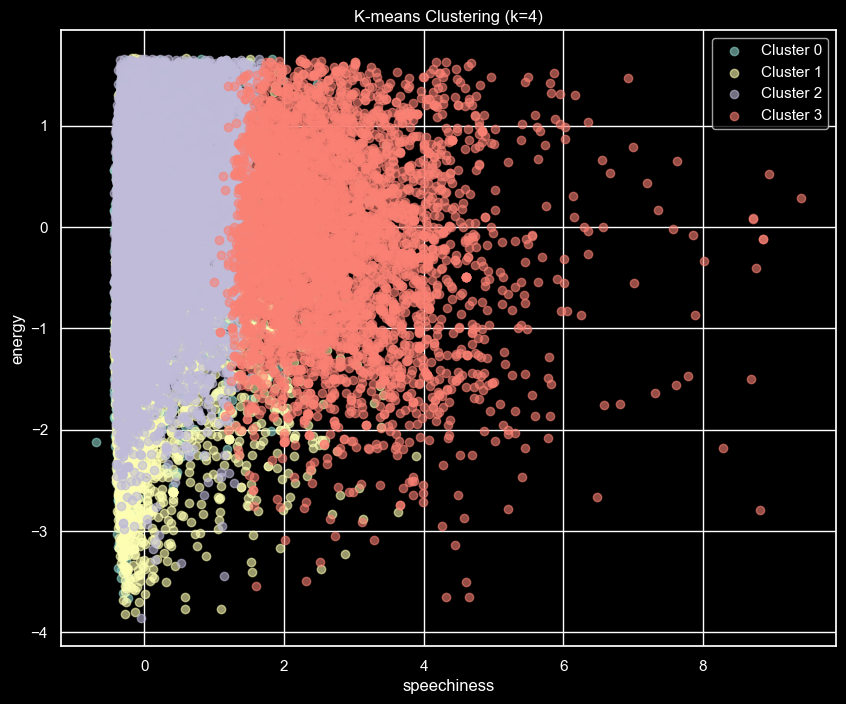

In [147]:
plt.figure(figsize=(10, 8))
for cluster in range(4):
    cluster_data = df[df['Cluster_kmean'] == cluster]
    plt.scatter(cluster_data["speechiness"], cluster_data['energy'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('speechiness')
plt.ylabel('energy')
plt.title('K-means Clustering (k=4)')
plt.legend()
plt.grid(True)
plt.show()

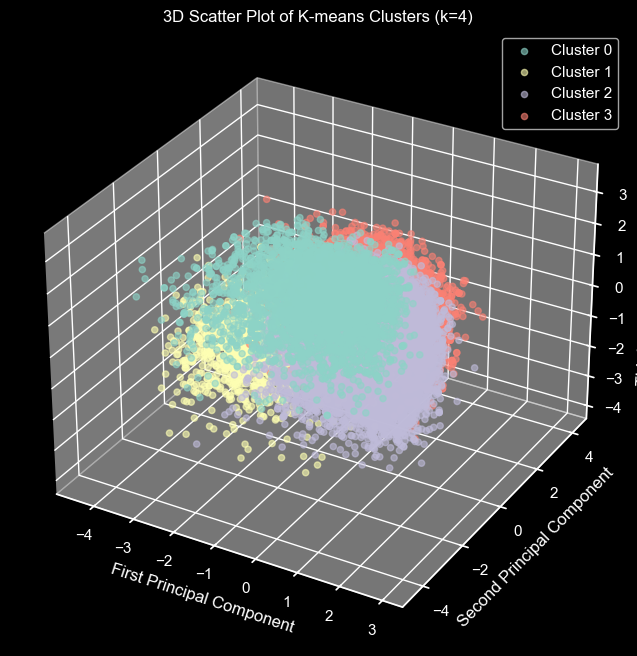

In [148]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(4):
    cluster_data = pca_data[labels == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {cluster}', alpha=0.6)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('3D Scatter Plot of K-means Clusters (k=4)')
plt.legend()
plt.show()

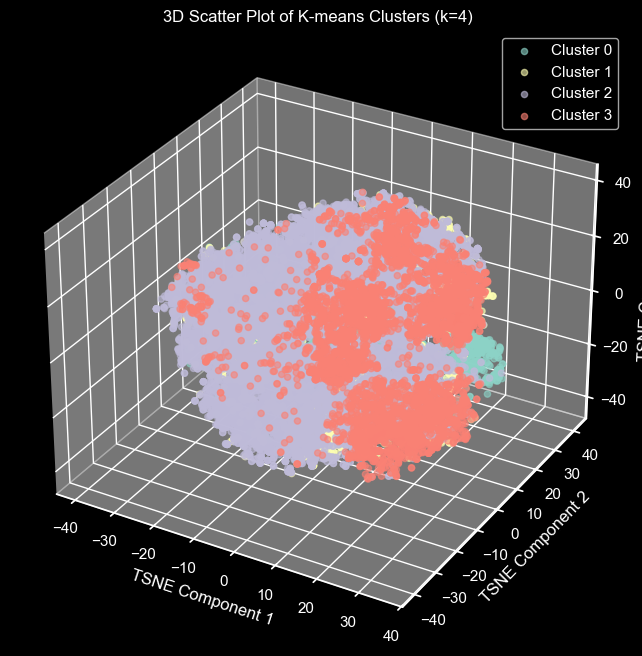

In [150]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to PCA-reduced data
tsne = TSNE(n_components=3, random_state=42)
tsne_data = tsne.fit_transform(pca_data[:, :-1])
tsne_data = pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_data['Cluster'] = labels

# Create a scatter plot of t-SNE results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(4):
    cluster_data = tsne_data[tsne_data['Cluster'] == cluster]
    ax.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], cluster_data['TSNE3'], label=f'Cluster {cluster}', alpha=0.6)

ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
ax.set_zlabel('TSNE Component 3')
ax.set_title('3D Scatter Plot of K-means Clusters (k=4)')
plt.legend()
plt.show()

In [153]:
centroid = kmeans.cluster_centers_
print(centroid)
import joblib

# Save K-means centroids
joblib.dump(kmeans.cluster_centers_, 'kmeans_centroids.pkl')

[[-4.27394563e-01 -1.09434106e+00  1.40090262e+00 -8.53076319e-02
  -3.81426681e-01  5.54932418e-02 -2.82100487e-02  1.85794226e-01
  -5.41741046e-01  1.18697898e-01  3.86761294e-01 -5.12349662e-01
  -7.12881205e-01 -5.82688439e-01]
 [-1.22512672e+00 -8.05559982e-03 -4.82765074e-01 -9.11941059e-02
  -1.71722424e-01  6.64590209e-02 -5.09084628e-03 -2.11744955e-01
   1.01608584e-01  3.97252407e-01 -6.05315629e-01 -3.57383908e-02
   1.06458913e+00 -4.96478084e-01]
 [ 4.15903348e-01 -6.91455752e-02 -2.43189593e-01 -3.46811478e-01
   1.07774018e-01 -1.53838403e-04  2.07200417e-03 -3.90071998e-02
   1.03561644e-01 -1.12239118e-02 -5.00264995e-02  1.97373131e-01
  -1.12847806e-01  2.30801979e-01]
 [-4.12753938e-02  1.13118190e+00  2.33979126e-01  1.42858747e+00
   6.76908659e-02 -1.05825981e-01  1.95639855e-02  1.94358293e-01
  -4.57172322e-02 -4.25455959e-01  4.44209891e-01 -2.85270674e-01
  -1.67815179e-02  7.96352504e-02]]


['kmeans_centroids.pkl']

In [ ]:
linkage_matrix = linkage(centroid, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering of K-means Centroids')
plt.xlabel('K-means Cluster')
plt.ylabel('Distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Choose a distance threshold or number of clusters
n_clusters = 2  # Adjust as needed
hierarchical_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

In [ ]:
# Add combined labels to your DataFrame
df['Combined_Cluster'] = combined_labelskmeans_labels = kmeans.labels_
combined_labels = [f"{k}_{h}" for k, h in zip(kmeans_labels, hierarchical_labels)]

# Add combined labels to your DataFrame
df['Combined_Cluster'] = combined_labels

In [ ]:
def predict_cluster(new_data):
    kmeans_cluster = kmeans.predict(new_data)[0]
    hierarchical_cluster = hierarchical_labels[kmeans_cluster]
    return f"{kmeans_cluster}_{hierarchical_cluster}"

# Example usage
new_song_features = [[...]]  # Replace with actual feature values
predicted_cluster = predict_cluster(new_song_features)
print(f"Predicted cluster: {predicted_cluster}")

In [155]:
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i}' for i in range(1, pca_data.shape[1] + 1)])
pca_df.to_parquet(r"DATA\pca_data.parquet", index=False, engine='pyarrow', compression='snappy')
tsne_data.to_parquet(r"DATA\tsne_data.parquet", index=False, engine='pyarrow', compression='snappy')
